# Clasificación útilizando aprendizaje de máquinas

En aprendizaje de máquinas, la regresión es la tarea de identificar a qué valor continuo una observación nueva pertenece, tomando como base un entrenamiento previo sobre un grupo de observaciones donde sí se conocían sus valores continuos correspondientes.

In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing 
import sklearn.ensemble
import sklearn.linear_model
import sklearn.svm
import sklearn.dummy
import matplotlib.pyplot as plt
import seaborn as sns # Paquete de visualización que funciona sobre matplotlib

Para entrenar y probar los modelos de clasificación, utilizaremos un conjunto de datos que contiene valores de propiedades junto con características asociadas a las mismas.

In [2]:
real_estate = pd.read_csv("data/real_estate.csv", delimiter=";")

In [3]:
real_estate.head()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude,price_unit_area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


Verificamos con el método pandas.DataFrame.describe() que las variables no tienen el mismo rango, por lo que seria necesario reescalarlas.

In [4]:
real_estate.describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude,price_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
real_estate.shape # Obtenemos las dimensiones de nuestro conjunto de datos.

(414, 7)

Para obtener una intuición general de las relaciones que existen entre variables, una práctica habitual es evaluar la correlación que existe entre las variables, sobretodo la correlación que existe entre las características y la etiqueta. Para esto utilizamos indicadores de estadística clásica como es el coeficiente de correlación de Pearson o Spearman.

In [6]:
correlation = real_estate.corr() # Por defecto este método calcula la correlación de Pearson.
correlation

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude,price_unit_area
transaction_date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
house_age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
distance_nearest_station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
number_convenience_stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price_unit_area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


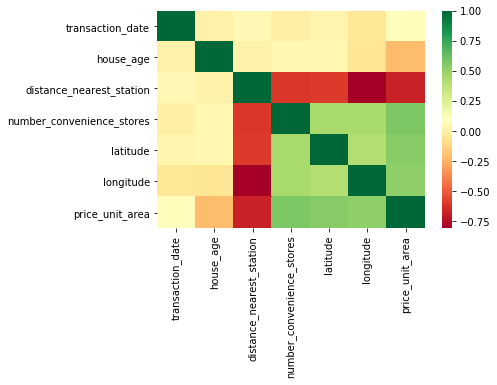

In [7]:
sns.heatmap(
    correlation,
    cmap="RdYlGn" # Utilizamos una paleta de colores divergente para visualizar diferencias en los valores positivos y negativos
) # Utilizamos seaborn para visualizar un mapa de calor de las correlaciones.

## Preprocesamiento

In [8]:
feature_names = [
    'transaction_date', 
    'house_age', 
    'distance_nearest_station', 
    'number_convenience_stores', 
    'latitude', 
    'longitude'
]

features = real_estate[feature_names]

In [9]:
label = real_estate.price_unit_area

Los algoritmos para entrenar modelos de aprendizaje de máquinas no se comportan bien en su mayoría con diferencias en los rangos de valores de sus características, por lo que es siempre una buena práctica reescalar los valores hacia un rango predeterminado.

In [10]:
scaler = sklearn.preprocessing.MinMaxScaler() # Instanciamos la clase del scaler que realizará una normalización de los datos
features = scaler.fit_transform(features) # Ajustamos el scaler y al mismo tiempo transformamos nuestras características

Verificamos que el rango de todas nuestras características ahora esté entre 0 y 1.

In [11]:
pd.DataFrame(features,columns=feature_names).describe()

,transaction_date,house_age,distance_nearest_station,number_convenience_stores,latitude,longitude
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,0.526131,0.404396,0.164047,0.409420,0.447892,0.645149
std,0.307631,0.260102,0.195233,0.294556,0.150390,0.165486
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.206050,0.041138,0.100000,0.374818,0.588257
50%,0.545455,0.367580,0.072525,0.400000,0.472976,0.701962
75%,0.818182,0.642694,0.221342,0.600000,0.549988,0.752372
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
features_train, features_test, label_train, label_test = sklearn.model_selection.train_test_split( 
    features,
    label,
    test_size=0.30, 
    random_state = 11, 
)

## Modelamiento

Para evaluar el rendimiento de nuestro modelos sobre el conjunto de prueba debemos utilizar métricas distintas a las que usábamos en clasificación. sklearn nos ofrece una serie de métricas especificas para regresión, las cuales se encuentran todas descritas en la documentación https://scikit-learn.org/stable/modules/model_evaluation.html .

In [13]:
def regression_report(y_true, y_pred):
    """
    Esta función recibe un arreglo de valores reales y predichos para 
    retornar un diccionario con una serie de métricas de regresión
    """
    return {
        'mae': sklearn.metrics.mean_absolute_error(y_true, y_pred),
        'rmse': sklearn.metrics.mean_squared_error(y_true, y_pred) ** 0.5,
        'r2': sklearn.metrics.r2_score(y_true, y_pred)
    }

### Regresión lineal

In [14]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(features_train, label_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lr_predictions = lr.predict(features_test)

In [16]:
lr_regression_report = regression_report(label_test, lr_predictions)
lr_regression_report

{'mae': 7.098167201942863,
 'rmse': 11.154714425923883,
 'r2': 0.5040618675072719}

### Support vector machine

In [17]:
svm = sklearn.svm.SVR() # Instanciamos una support vector machine con un kernel lineal
svm.fit(features_train, label_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [18]:
svm_predictions = svm.predict(features_test)

In [19]:
svm_regression_report = regression_report(label_test, svm_predictions)
svm_regression_report

{'mae': 7.621752619669486, 'rmse': 11.98334176277971, 'r2': 0.4276436826302662}

### Random forests

In [20]:
rf = sklearn.ensemble.RandomForestRegressor()
rf.fit(features_train, label_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [21]:
rf_predictions = rf.predict(features_test)

In [22]:
rf_regression_report = regression_report(label_test, rf_predictions)
rf_regression_report

{'mae': 5.064831819047617, 'rmse': 9.73887919364118, 'r2': 0.6219680147638262}

### Regresor tonto

In [23]:
dummy = sklearn.dummy.DummyRegressor()
dummy.fit(features_train, label_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [24]:
dummy_predictions = dummy.predict(features_test)

In [25]:
dummy_regression_report = regression_report(label_test, dummy_predictions)
dummy_regression_report

{'mae': 12.224824913494809,
 'rmse': 15.84202098213816,
 'r2': -0.000303430094670043}

## Resumen

Evaluemos cuál fue el modelo que tuvo el mejor rendimiento en cada una de las métricas.

In [26]:
performances = pd.DataFrame( # Consolidamos todas las métricas en un DatFrame
    data = [
        lr_regression_report,
        svm_regression_report,
        rf_regression_report,
        dummy_regression_report
    ],
    index = [
        "Linear Regression",
        "Support Vector Machine",
        "Random Forest",
        "Regresor Tonto"
    ]
).sort_values( # Ordenamos los valores
    by="rmse"
)
performances

,mae,rmse,r2
Random Forest,5.064832,9.738879,0.621968
Linear Regression,7.098167,11.154714,0.504062
Support Vector Machine,7.621753,11.983342,0.427644
Regresor Tonto,12.224825,15.842021,-0.000303


([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

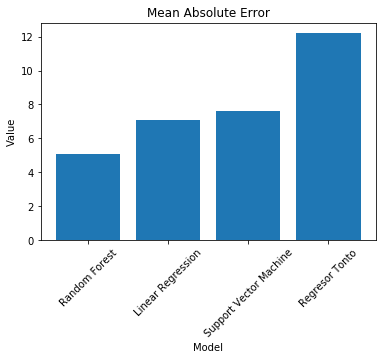

In [27]:
plt.bar( # Visualizamos los resultados como un gráfico de barras
    x=performances.index,
    height=performances.mae,
)
plt.title("Mean Absolute Error")
plt.xlabel("Model")
plt.ylabel("Value")
plt.xticks(rotation=45)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

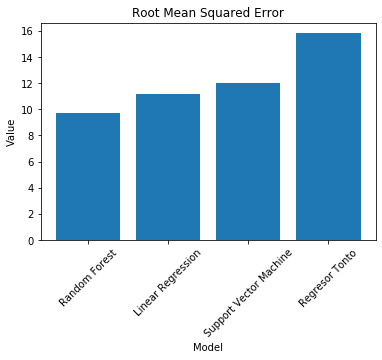

In [28]:
plt.bar(
    x=performances.index,
    height=performances.rmse,
)
plt.title("Root Mean Squared Error")
plt.xlabel("Model")
plt.ylabel("Value")
plt.xticks(rotation=45)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

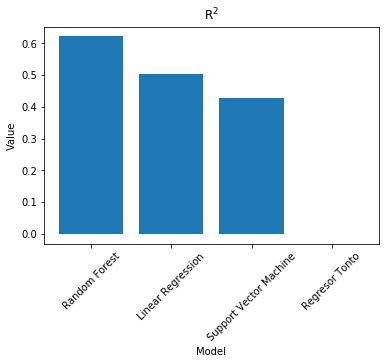

In [29]:
plt.bar(
    x=performances.index,
    height=performances.r2,
)
plt.title("R$^2$")
plt.xlabel("Model")
plt.ylabel("Value")
plt.xticks(rotation=45)